In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import rc
import modelclass as mc
import modelsandbox as ms

## Illustrating solving 

In [2]:
# Use LaTeX throughout the figure for consistency
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f, r, p,  x0, y0, nmax=40,alfa=1):
    """Make a cobweb plot.

    Plot y = f(x; r ,P) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r,p), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, y0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = (1.-alfa) * py[n-1] + alfa*f(px[n-1], r ,p)
        
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    #ax.grid(which='minor', alpha=0.5)
    #ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    yannotate = '$y = 1-{:.1f} x + {:.1f} x^2$'.format(r,p)
    ax.set_title('Solving two simultaneous equations with two variables')
    ax.annotate('$x = y$', xy=(0.3, 0.3), xytext=(0.4, 0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05),)
    ax.annotate(yannotate, xy=(0.19, 0.85), xytext=(0.35, 0.9),
                arrowprops=dict(facecolor='black', shrink=0.05),)
    ax.annotate('$Starting point$', xy=(x0,y0), xytext=(0.35, 0.),
                arrowprops=dict(facecolor='black', shrink=0.05),)

    #plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)
    plt.show()

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

In [3]:
func = AnnotatedFunction(lambda x,r,p: 1+-r*x + p*x*x, r'$y = 1-r x + p x^2$')

### A nice model

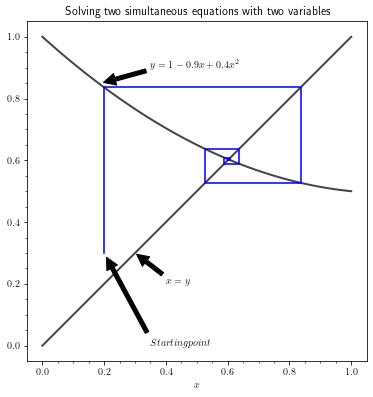

In [4]:
plot_cobweb(func, 0.9,0.4, 0.2,0.3,100,alfa=1)

### A diverging model 

The solution explodes 

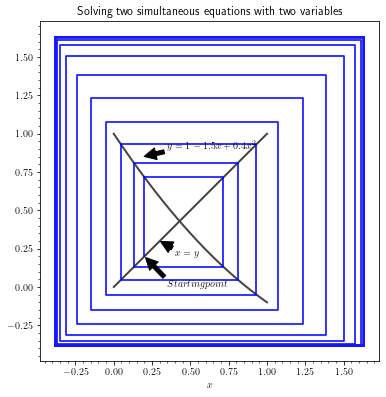

In [5]:
plot_cobweb(func, 1.5,0.4, 0.2,0.2,100,alfa=1.)

### A damped diverging model 

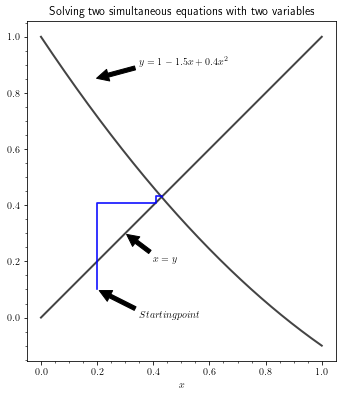

In [6]:
plot_cobweb(func, 1.5,0.4, 0.2,0.1,100,alfa=0.5)

## A simultaneous model in Modelflow 

In [7]:
fx = '''
FRML <Z> y  = 1-r*x +p*x**2 $ 
FRML xx  x  = y $ 
'''
mx = mc.model(fx,name='A simultanelus model')

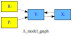

In [8]:
mx.drawmodel(size=(1,1))

In [9]:
df = pd.DataFrame({'X' : [0.2,0.2] , 'Y' :[0.,0.] , 'R':[1.,0.4] , 'P':[0.,0.4]})
df

,X,Y,R,P
0,0.2,0.0,1.0,0.0
1,0.2,0.0,0.4,0.4


In [10]:
gauss = mx(df,max_iterations=100,dumpvar='X Y',ldumpvar=True,alfa=0.8)

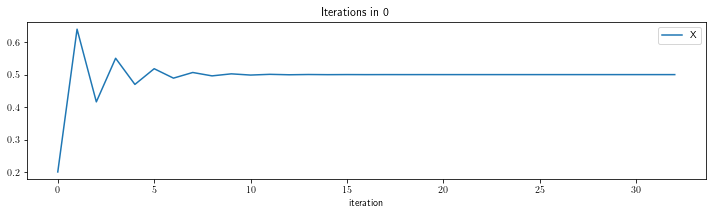

In [11]:
mx.show_iterations('X',per=0);

In [ ]:
gauss